<a href="https://colab.research.google.com/github/SujitVarma299/2311cs020685/blob/main/Toyota_car(...).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Toyota.csv to Toyota (2).csv


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [48]:
import statsmodels.formula.api as smf
model = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()

In [49]:
model.params


,0
Intercept,3897.321399
HP,-885.597359
Doors,394.962692
Cylinders,15589.285597
Gears,18026.469950


In [50]:
print(model.tvalues,'\n',model.pvalues)

Intercept     2.539102
HP          -13.821563
Doors         0.395456
Cylinders     2.539102
Gears         3.509853
dtype: float64 
 Intercept    1.121896e-02
HP           7.077542e-41
Doors        6.925654e-01
Cylinders    1.121896e-02
Gears        4.622708e-04
dtype: float64


In [51]:
(model.rsquared,model.rsquared_adj)


(0.11912687743083694, 0.11727889185901341)

In [52]:
ml_wv = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()


In [53]:


print(ml_wv.tvalues,'\n',ml_wv.pvalues)


Intercept     2.539102
HP          -13.821563
Doors         0.395456
Cylinders     2.539102
Gears         3.509853
dtype: float64 
 Intercept    1.121896e-02
HP           7.077542e-41
Doors        6.925654e-01
Cylinders    1.121896e-02
Gears        4.622708e-04
dtype: float64


In [54]:
rsq = model.rsquared
rsq_wv = ml_wv.rsquared
vif = 1/(1-rsq)
vif_wv = 1/(1-rsq_wv)
print(vif,vif_wv)

1.1352372712694314 1.1352372712694314


In [55]:
rsq_hp = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.1352372712694314

In [56]:
rsq_hp = smf.ols('Doors~HP++Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.044040461820872

In [57]:
rsq_hp = smf.ols('HP~KM+Doors+Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.2059225102404403

In [58]:
Vif_frame = pd.DataFrame({'Variables':['Doors','HP','Cylinders','Gears'],'VIF':[vif,vif_wv,vif_hp,vif_hp]})
Vif_frame

,Variables,VIF
0,Doors,1.135237
1,HP,1.135237
2,Cylinders,1.205923
3,Gears,1.205923


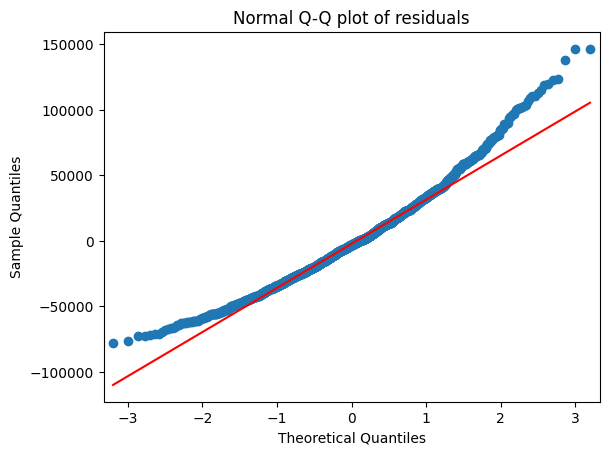

In [59]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [60]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()


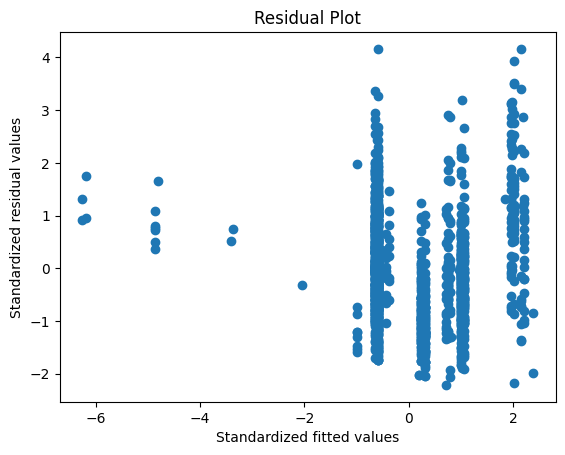

In [61]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [62]:
list(np.where(model.resid>18660))

[array([   7,    9,   10,   11,   13,   15,   41,   42,   47,   51,  139,
         184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  195,
         196,  197,  198,  199,  200,  203,  204,  206,  207,  376,  377,
         378,  379,  380,  381,  382,  383,  384,  385,  386,  387,  388,
         389,  390,  391,  392,  393,  394,  395,  396,  397,  398,  400,
         401,  402,  403,  405,  406,  407,  408,  409,  411,  412,  413,
         415,  418,  422,  423,  424,  425,  426,  427,  428,  430,  431,
         433,  601,  602,  603,  604,  605,  606,  607,  608,  609,  610,
         611,  612,  613,  614,  615,  616,  617,  618,  619,  620,  621,
         622,  623,  624,  625,  626,  627,  628,  629,  630,  631,  632,
         633,  634,  635,  636,  637,  638,  639,  640,  641,  642,  643,
         644,  645,  646,  647,  648,  649,  650,  651,  652,  653,  654,
         655,  656,  657,  659,  660,  661,  662,  663,  664,  665,  666,
         667,  668,  669,  670,  671, 

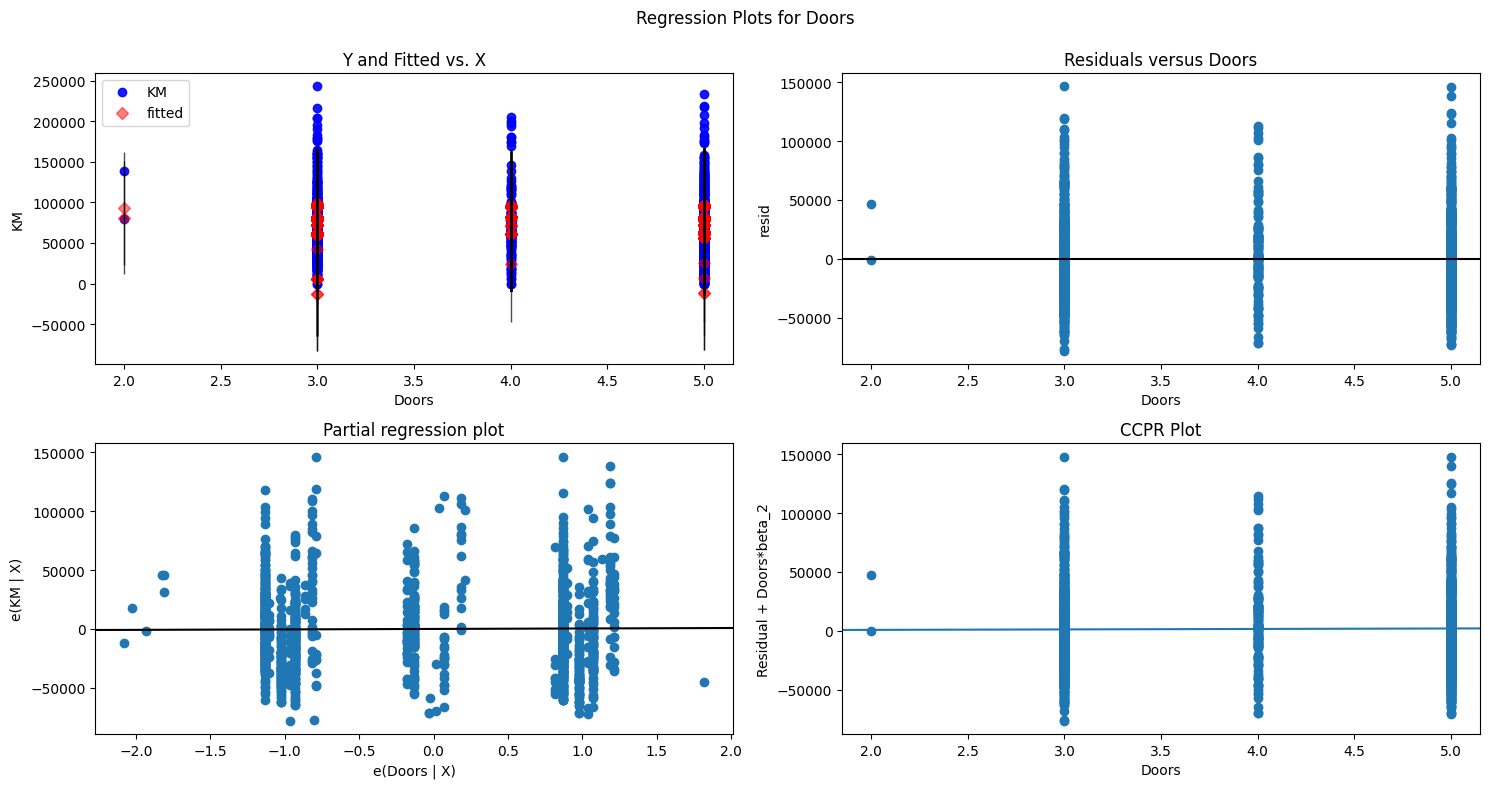

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

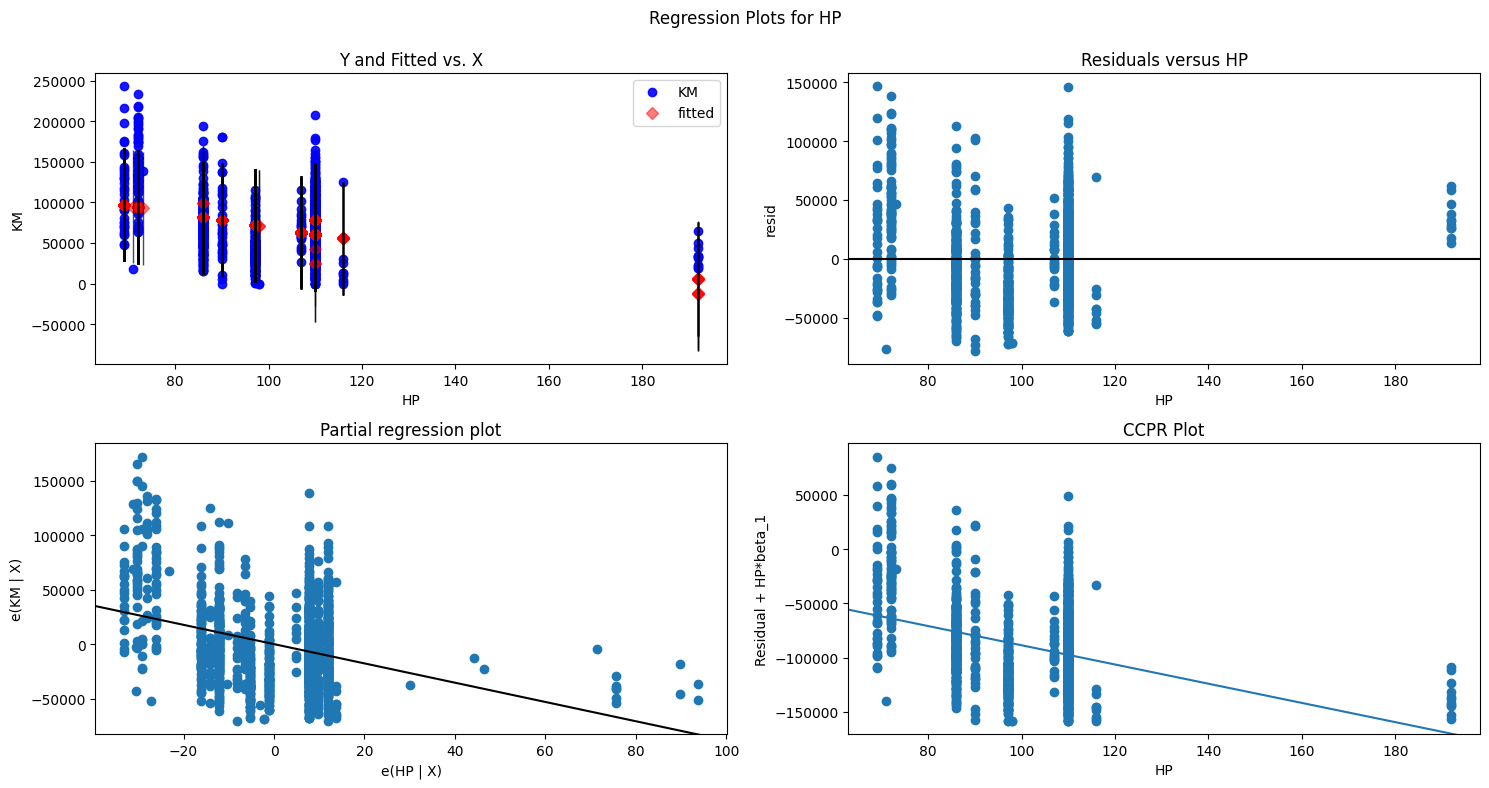

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

In [65]:
final_ml = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     64.46
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           4.30e-39
Time:                        05:55:02   Log-Likelihood:                -17047.
No. Observations:                1434   AIC:                         3.410e+04
Df Residuals:                    1430   BIC:                         3.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3897.3214   1534.921      2.539      0.011     886.382    6908.260
HP          -885.5974     64.074    -13.822      0.000   -1011.286    -759.909
Doors        394.9627    998.753      0.395      0.693   -1564.214    2354.140
Cylinders   1.559e+04   6139.685      2.539      0.011    3545.530    2.76e+04
Gears       1.803e+04   5135.962      3.510      0.000    7951.642    2.81e+04
==============================================================================
Omnibus:                      117.913   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.560
Skew:                           0.698   Prob(JB):                     4.52e-34
Kurtosis:                       3.788   Cond. No.                     1.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
final_ml_V = smf.ols("HP~KM+Gears+Doors",data = df).fit()

In [67]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.17075932200600774, 11572.394115893143)

In [68]:
final_ml = smf.ols('HP~KM+Gears+Doors',data=df).fit()

In [69]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.17075932200600774, 11572.394115893143)

In [70]:
final_ml_W = smf.ols("HP~KM+Gears+Doors",data = df).fit()

In [71]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.17075932200600774, 11572.394115893143)

In [72]:
final_ml_V.predict(df)

,0
0,101.990882
1,98.537541
2,102.692835
3,101.855948
4,103.120128
...,...
1431,105.509562
1432,105.715025
1433,105.979039
1434,105.992346


In [73]:
final_ml_V.predict(df)[0:5]
pred_df = pd.DataFrame(final_ml_V.predict(df))
pred_df.head()

,0
0,101.990882
1,98.537541
2,102.692835
3,101.855948
4,103.120128


In [74]:
new_data = pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[0])
new_data.head()

,HP,VOL,SP,WT
0,40,95,102,35


In [75]:
data = {
    'Actual': df['KM'],
    'Predicted': final_ml_V.predict(df)
}

In [76]:
Actual = df['KM']
Predicted = final_ml_V.predict(df)

In [77]:
print(df['KM'])

0       46986
1       72937
2       41711
3       48000
4       38500
        ...  
1431    20544
1432    19000
1433    17016
1434    16916
1435        1
Name: KM, Length: 1436, dtype: int64


In [78]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [79]:
df_new = pd.DataFrame({'Actual':Actual,'Predicted':Predicted})
df_new

,Actual,Predicted
0,46986,101.990882
1,72937,98.537541
2,41711,102.692835
3,48000,101.855948
4,38500,103.120128
...,...,...
1431,20544,105.509562
1432,19000,105.715025
1433,17016,105.979039
1434,16916,105.992346


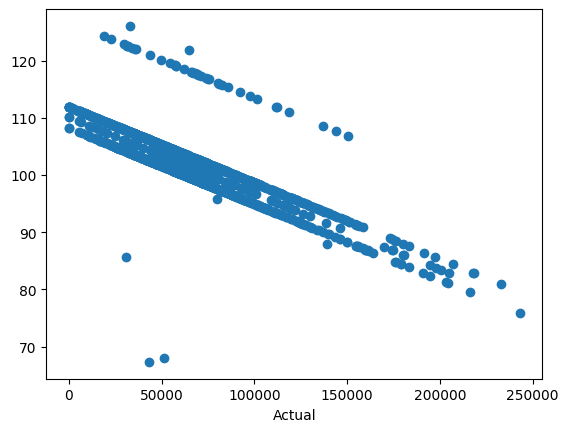

In [80]:
plt.scatter(df_new['Actual'],df_new['Predicted'])
plt.xlabel('Actual')
plt.show()

In [85]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Mfg_Year+Central_Lock+Powered_Windows', data=df).fit()

In [87]:
(model.rsquared,model.rsquared_adj)

(0.796155465358528, 0.7957284167524356)